# Sound Emotion Recognition
## 1. Installing required libraries

Run on Anaconda Powershell:

conda install -c anaconda pyaudio
conda install -c pysoundfile
conda install -c conda-forge librosa

In [1]:
import pandas as pd
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  

## 2. Define a function extract_feature to extract the mfcc, chroma, and mel features from a sound file. 

This function takes 4 parameters- the file name and three Boolean parameters for the three features:


mfcc: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
chroma: Pertains to the 12 different pitch classes
mel: Mel Spectrogram Frequency

In [2]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

## 3. Create a dictionary to classify different emotions

In [3]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
   }
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## 4. Loading the data

In [4]:
#Testing glob. glob function
file=glob.glob("C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_*\\*.wav")
file
file_name=os.path.basename(file[1])
emotion=emotions[file_name.split("-")[2]]
emotion               

'neutral'

In [5]:
# Checking length of speech files

len(file)

1440

## Data Description

Data contains 1440 files of speech recordings from 24 actors. They could be saying one of two phrases:

1. "Kids are talking by the door"
2. "Dogs are sitting by the door"

The professional actors recordings were rated for genuineness on 8 emotions:

Neutral, calm, happy, sad, angry,fearful, disgust,surprised

## File naming convention

Each of the 1440 speech files has a unique filename consisting of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

Filename identifiers 

* Modality (03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
* Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

### Filename example: 03-01-06-01-02-01-12.mp4 

*Audio-only (03)
*Speech (01)
*Fearful (06)
*Normal intensity (01)
*Statement “dogs” (02)
*1st Repetition (01)
*12th Actor (12)
*Female, as the actor ID number is even.

In [6]:
#Sample of list of files with different actors and emotion codes

file[:5]

['C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01\\03-01-01-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01\\03-01-01-01-01-02-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01\\03-01-01-01-02-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01\\03-01-01-01-02-02-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01\\03-01-02-01-01-01-01.wav']

## 5. Turn number into emotion
Using the emotions dictionary, this number is turned into an emotion, and our function checks whether this emotion is in our list of observed_emotions; if not, it continues to the next file. It makes a call to extract_feature and stores what is returned in ‘feature’. Then, it appends the feature to x and the emotion to y. So, the list x holds the features and y holds the emotions. We call the function train_test_split with these, the test size, and a random state value, and return that.

In [7]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    X,y=[],[]
    for file in glob.glob("C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        X.append(feature)
        y.append(emotion)
    return train_test_split(np.array(X), y, test_size=test_size, random_state=9)

Split the dataset into training and testing sets.  Test set 25% of everything and use the load_data function for this.

In [8]:
#DataFlair - Split the dataset
X_train,X_test,y_train,y_test=load_data(test_size=0.2)

In [9]:
def load_data2(test_size=0.2):
    X,y=[],[]
    for file in glob.glob("C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        X.append(feature)
        y.append(emotion)
    X_df= pd.DataFrame(np.array(X))
    y_df=pd.DataFrame(np.array(y))
    df= pd.concat([X_df.reset_index(drop=True), y_df], axis=1)
    return df

### EDA Sample guide Kaggle -
https://www.kaggle.com/abhishek2195/ravdess-data

In [10]:
path="C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\"
#C:\Users\HP\OneDrive - Michigan State University\Masters - Data Science\MSU\Fall\Machine Learning\Project\Speech recognition data

In [11]:

EMOTIONS={1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
SAMPLE_RATE=16000

In [12]:
# Getting File Paths
folder_names=os.listdir(path)
folder_names.sort()

file_emotions=[]
file_gender=[]
file_intensity=[]
file_paths=[]

for i in folder_names:
    file_names=os.listdir(path+i)
    
    for file in file_names:
        parts=file.split('.')[0].split('-')
        file_emotions.append(int(parts[2]))
        file_intensity.append(int(parts[3]))
        if int(parts[6])%2==0:
            file_gender.append('female')
        else:
            file_gender.append('male')
        file_paths.append(path+i+'/'+file)

In [13]:
# Creating Dataframe of filepaths
df=pd.DataFrame({
    'path':file_paths,
    'intensity':file_intensity,
    'gender':file_gender,
    'emotion':file_emotions
})
df['emotion']=df['emotion'].map(EMOTIONS)
print('Shape=>',df.shape)
df.head()

Shape=> (1440, 4)


,path,intensity,gender,emotion
0,C:\Users\HP\OneDrive - Michigan State Universi...,1,male,neutral
1,C:\Users\HP\OneDrive - Michigan State Universi...,1,male,neutral
2,C:\Users\HP\OneDrive - Michigan State Universi...,1,male,neutral
3,C:\Users\HP\OneDrive - Michigan State Universi...,1,male,neutral
4,C:\Users\HP\OneDrive - Michigan State Universi...,1,male,calm


In [14]:
# Class Distribution in count
print(df['emotion'].value_counts())
# Class Distribution in percentage
print(df['emotion'].value_counts(normalize=True)*100)

fear        192
surprise    192
happy       192
angry       192
calm        192
sad         192
disgust     192
neutral      96
Name: emotion, dtype: int64
fear        13.333333
surprise    13.333333
happy       13.333333
angry       13.333333
calm        13.333333
sad         13.333333
disgust     13.333333
neutral      6.666667
Name: emotion, dtype: float64


In [15]:
# Picking a sample file from each class
sample_signals=[]
for i in EMOTIONS.values():
    sample_signals.append(df[df['emotion']==i]['path'].reset_index(drop=True)[0])

sample_signals

['C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01/03-01-01-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01/03-01-02-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01/03-01-03-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01/03-01-04-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Project\\Speech recognition data\\Actor_01/03-01-05-01-01-01-01.wav',
 'C:\\Users\\HP\\OneDrive - Michigan State University\\Masters - Data Science\\MSU\\Fall\\Machine Learning\\Pr

In [16]:
# Playing an audio file from each class
import IPython.display as ipd  # To play sound in the notebook

for emotion,path in zip(EMOTIONS.values(),sample_signals):
    signal,sr=librosa.load(path,sr=SAMPLE_RATE)
    print(f"Emotion:{emotion}")
    # Play the Audio
    ipd.display(ipd.Audio(signal,rate=SAMPLE_RATE))

Emotion:neutral


Emotion:calm


Emotion:happy


Emotion:sad


Emotion:angry


Emotion:fear


Emotion:disgust


Emotion:surprise


In [17]:
# Parameters for Mel Spectrogram
SAMPLE_RATE=16000
FFT_WINDOW=2048
HOP_LENGTH=25
NUM_MEL_BANDS=70

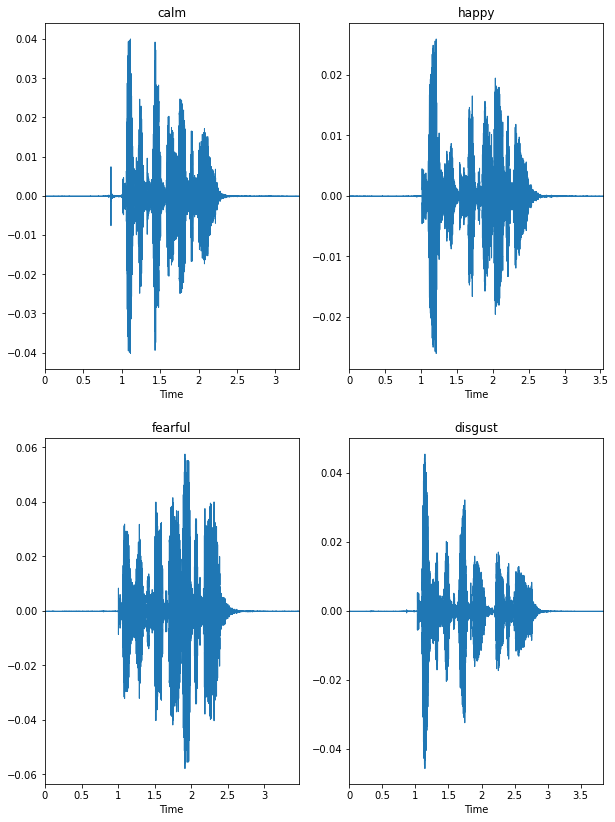

In [18]:
# Visualizing an audio file from each observed class 
import librosa.display

fig,axes=plt.subplots(2,2,figsize=(10,14))

for ax,emotion,path in zip(axes.flatten(),observed_emotions,sample_signals):
    signal,sr=librosa.load(path,sr=SAMPLE_RATE)
    librosa.display.waveplot(signal,sr=SAMPLE_RATE,ax=ax)
    ax.set(title=emotion)

In [19]:
# Function for Extracting Mel Spectrogram
def GetMElSpectrogram(path,sampling_rate,fft_window,hop_length,num_mel_bands):
    # Loading Audio
    signal,_=librosa.load(path,sr=sampling_rate)
    # Padding Signal at 3 seconds
    if len(signal) > (3*sampling_rate):
        signal=signal[:(3*sampling_rate)]
    else:
        pad_len=sampling_rate-len(signal)
        new_signal=np.zeros(3*sampling_rate)
        new_signal[:len(signal)]=signal
        signal=new_signal
    # Getting Mel Spectogram
    mel_spectogram=librosa.feature.melspectrogram(signal,sr=sampling_rate,n_fft=fft_window,
                                                 hop_length=hop_length,n_mels=num_mel_bands)
    # Convert to Log Mel Spectogram
    log_mel_spectogram=librosa.power_to_db(mel_spectogram)
    return log_mel_spectogram

In [20]:
# Get Mel Spectrogram for sample audio files
sample_melspec=[GetMElSpectrogram(i,SAMPLE_RATE,FFT_WINDOW,HOP_LENGTH,NUM_MEL_BANDS) for i in sample_signals]

print(f"Shape of a mel spectrogram:{sample_melspec[0].shape}")

Shape of a mel spectrogram:(70, 1921)


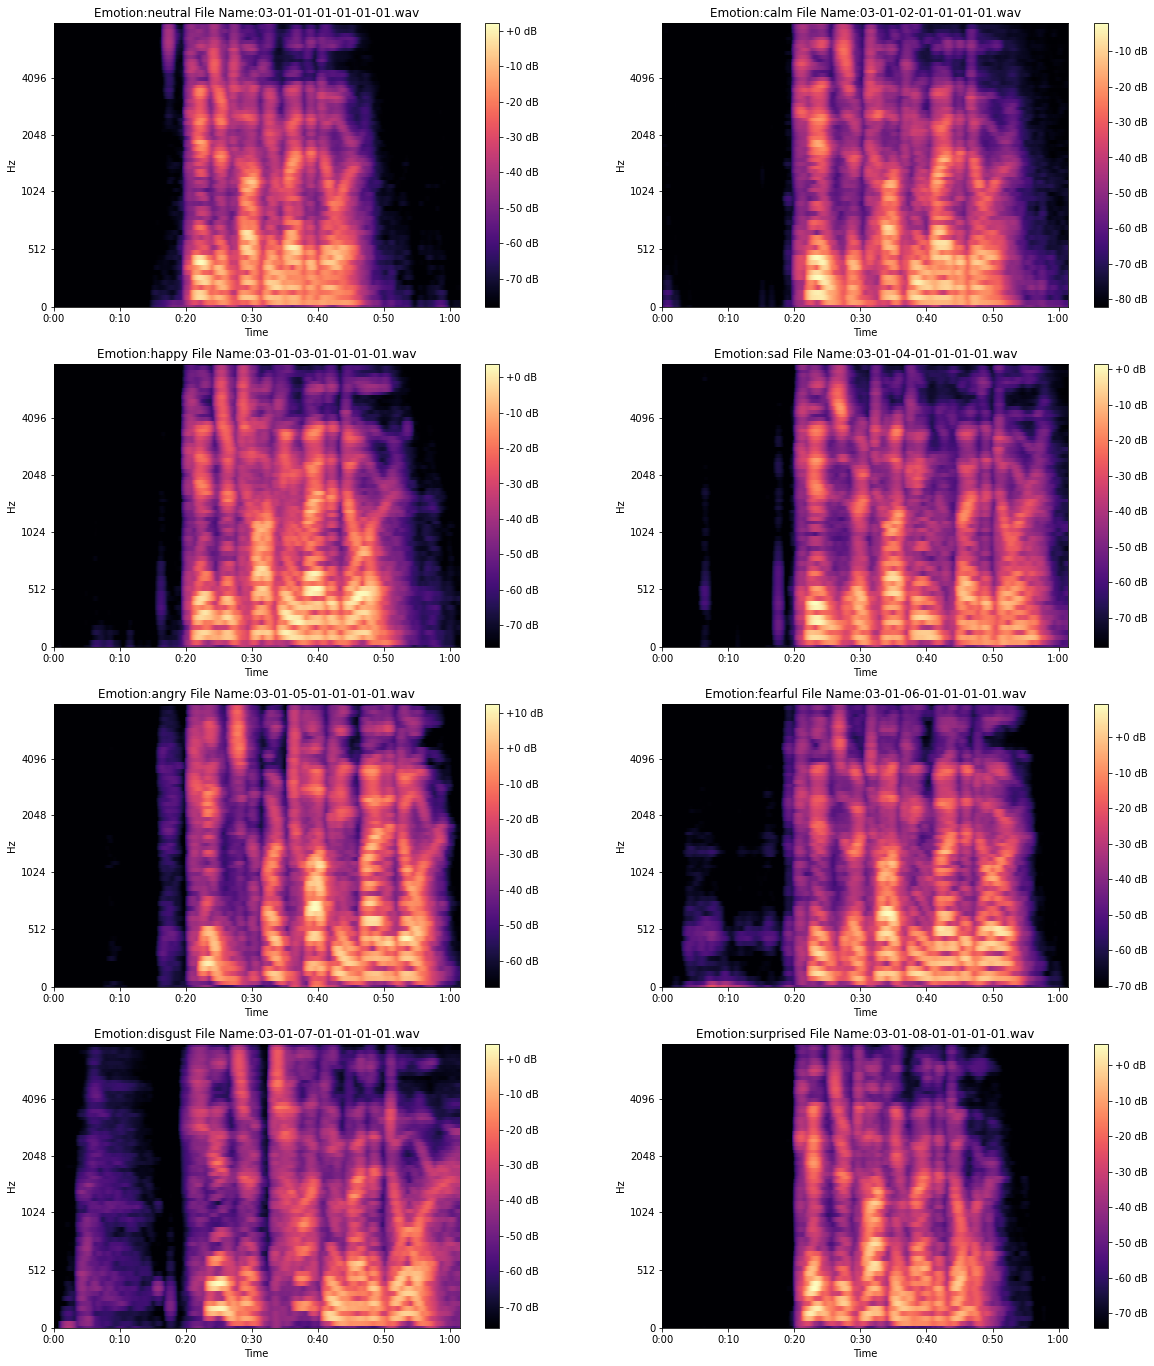

In [21]:
# Visualizing Mel Spectrogram

#import librosa.display

fig,axes=plt.subplots(4,2,figsize=(20,24))

for ax,i,j,k in zip(axes.flatten(),emotions.values(),sample_signals,sample_melspec):
    img=librosa.display.specshow(k,x_axis='time',y_axis='mel',sr=SAMPLE_RATE,ax=ax)
    ax.set(title="Emotion:{} File Name:{}".format(i,j.split('/')[-1]))
    fig.colorbar(img, ax=ax, format="%+2.f dB")

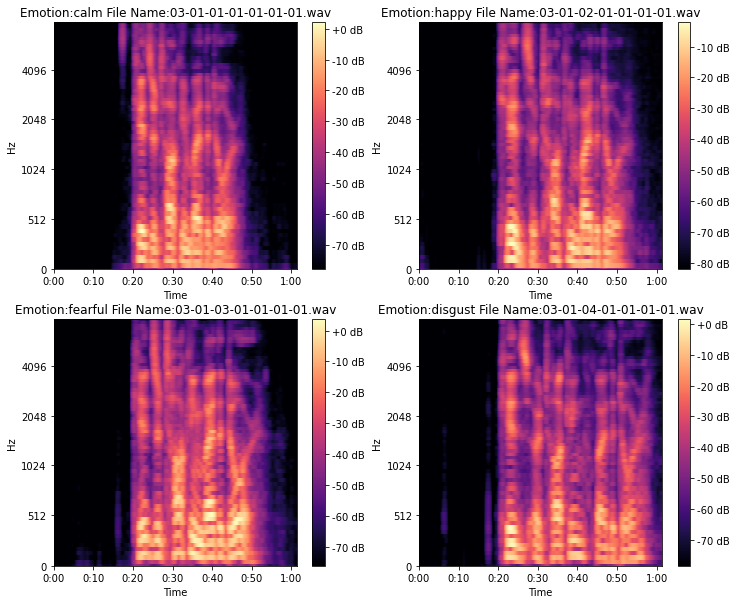

In [22]:
##Melspectogram for observed emotions

fig,axes=plt.subplots(2,2,figsize=(12,10))

for ax,i,j,k in zip(axes.flatten(),observed_emotions,sample_signals,sample_melspec):
    img=librosa.display.specshow(k,x_axis='time',y_axis='mel',sr=SAMPLE_RATE,ax=ax)
    ax.set(title="Emotion:{} File Name:{}".format(i,j.split('/')[-1]))
    fig.colorbar(img, ax=ax, format="%+2.f dB")

In [23]:
load_data2(test_size=0.2)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,0
0,-709.033447,55.766102,2.698180,16.391754,3.372371,-1.101144,-5.798337,-8.981228,-8.994224,1.848764,...,0.000007,0.000007,0.000005,0.000006,0.000005,0.000005,0.000003,0.000002,1.469765e-06,calm
1,-695.378418,61.313122,-0.602172,14.277533,4.695726,-2.752941,-7.079349,-8.101913,-8.396766,2.075876,...,0.000009,0.000004,0.000004,0.000003,0.000002,0.000003,0.000003,0.000002,7.818144e-07,calm
2,-687.338623,57.978222,0.120546,13.901185,1.862311,1.503660,-6.355483,-8.991886,-8.013115,2.283419,...,0.000037,0.000035,0.000050,0.000020,0.000023,0.000015,0.000010,0.000004,1.583408e-06,calm
3,-684.722900,62.306278,-0.779712,15.710409,2.552247,1.159994,-6.514369,-9.151710,-7.505528,0.768941,...,0.000025,0.000023,0.000015,0.000012,0.000014,0.000031,0.000014,0.000005,1.657727e-06,calm
4,-717.240356,63.731392,2.225929,15.644918,4.033844,-2.028955,-5.899800,-5.539160,-7.947824,2.182504,...,0.000003,0.000002,0.000003,0.000003,0.000003,0.000003,0.000002,0.000001,6.484481e-07,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-551.100281,40.109940,-16.069901,2.646759,-18.086809,-12.905876,-19.414516,-16.507488,-6.766122,-6.917022,...,0.001957,0.001422,0.001662,0.001646,0.001037,0.000614,0.000549,0.000555,3.913975e-04,disgust
764,-592.895752,44.440998,-10.581187,-6.669079,-19.595003,-7.214552,-19.723213,-13.020492,-2.537948,-7.940534,...,0.000288,0.000283,0.000216,0.000199,0.000134,0.000126,0.000096,0.000057,5.140549e-05,disgust
765,-491.324097,21.583965,-22.555973,-6.400385,-18.038723,-11.999329,-18.401785,-5.820825,-2.152709,-8.241044,...,0.004907,0.004357,0.003394,0.003262,0.002282,0.002043,0.001536,0.001015,4.330029e-04,disgust
766,-498.295715,22.245922,-24.396896,-7.702212,-18.353798,-12.045652,-20.079973,-8.234941,-4.234501,-6.991613,...,0.002246,0.002249,0.003821,0.003381,0.003851,0.002729,0.001790,0.001258,1.082642e-03,disgust


## 6. Observe the shape of the training and testing datasets:

In [24]:
#DataFlair - Get the shape of the training and testing datasets
print((X_train.shape[0], X_test.shape[0]))

(614, 154)


## 7. And get the number of features extracted.

In [25]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 180


## 8. Initialize an MLPClassifier. 

This is a Multi-layer Perceptron Classifier; it optimizes the log-loss function using LBFGS or stochastic gradient descent. Unlike SVM or Naive Bayes, the MLPClassifier has an internal neural network for the purpose of classification. This is a feedforward ANN model.

In [26]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), 
                    learning_rate='adaptive', max_iter=300, random_state=42)

## 9. Fit/train the model.

In [27]:
#DataFlair - Train the model
model.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=300, random_state=42)

## 10. Predict values for the test set. 

#### This gives us y_pred (the predicted emotions for the features in the test set).

In [28]:
#DataFlair - Predict for the test set
y_pred=model.predict(X_test)

## 11. Model Accuracy

#### To calculate the accuracy of our model, we’ll call up the accuracy_score() function we imported from sklearn. Finally, we’ll round the accuracy to 2 decimal places and print it out.

In [29]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.32%


In [30]:
def evaluate(y_test, y_pred):
    cm  = confusion_matrix(y_test, y_pred)
    num_correct = sum(cm[i][i] for i in range(4))
    acc = np.round(num_correct*100/cm.sum())
    return acc

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [33]:
lr = LogisticRegression(penalty='none', random_state=1, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[25  8  8  3]
 [ 6 19  8  8]
 [ 1  2 20 10]
 [ 4  6 10 16]]

Accuracy: 52.0%


In [34]:
# Ridge Regression, L2 Penalty

Ridge = LogisticRegression(penalty='l2', solver='lbfgs', random_state=1,max_iter=1000)
Ridge.fit(X_train, y_train)
y_pred = Ridge.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[34  4  4  2]
 [ 5 27  3  6]
 [ 2  4 16 11]
 [ 3  5  9 19]]

Accuracy: 62.0%


In [35]:
#Lasso

lr = LogisticRegression(penalty='l1', solver='saga', random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[39  3  1  1]
 [ 6 26  2  7]
 [ 3  4 15 11]
 [ 4  6  5 21]]

Accuracy: 66.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Apply kernels to transform the data to a higher dimension

In [48]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(kernel_type):
    if kernel_type == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif kernel_type == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif kernel_type == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif kernel_type == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

## Call the SVC() model from sklearn and fit to the training data

In [54]:
for i in range(4):
    # Separate data into test and training sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernels
    
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred)) #from sklearn.metrics import classification_report, confusion_matrix  

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.28      1.00      0.44        41
           2       1.00      0.21      0.35        33
           3       0.67      0.06      0.10        36

    accuracy                           0.32       154
   macro avg       0.49      0.32      0.22       154
weighted avg       0.45      0.32      0.22       154

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.56      0.61      0.58        41
           2       0.78      0.55      0.64        33
           3       0.48      0.42      0.45        36

    accuracy                           0.64       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.64      0.64      0.63       154

Evaluation: Sigmoid kernel
              precision    recall  f1-score   supp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RBF kernel performs the best without hyperparameter tuning for C: permissible error in decision boundary

#### C (Regularisation): 

Penalty parameter,represents misclassification or error term, tells the SVM optimisation how much error is bearable. Controls trade-off between decision boundary and misclassification term.

The higher the C, the more accurate the classification and the lower the error, also there is a chance to overfit.


#### Gamma: 

* Only tuned for RBF kernel.

* when gamma is higher, nearby points to the decision boundary will have high influence; low gamma means far away points also be considered to get the decision boundary.

### Tuning the hyper-parameters of an estimator
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

Grid search is commonly used for hyper-parameter tuning, methodically builds and evaluates a model for each combination of algorithm parameters specified.

In [56]:
from sklearn.model_selection import GridSearchCV

In [64]:
#Create a dictionary called parameters with some parameters for kernels, C and gamma
param_grid = {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [65]:
# Create a GridSearchCV object and fit it to the training data

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [66]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [77]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
min_sample_leaf

In [70]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'rbf',C = 100, gamma = 0.01, random_state=0)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[40  0  3  1]
 [ 1 35  2  3]
 [ 1  2 27  3]
 [ 1  5  6 24]]

Accuracy: 82.0%


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=7, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[41  0  1  2]
 [ 8 24  2  7]
 [ 4  5 20  4]
 [ 3  6  5 22]]

Accuracy: 69.0%


In [85]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [113]:
#Create a dictionary called parameters with some parameters for kernels, C and gamma
param_grid_rf = {"n_estimators": [10,100,200,300],'min_samples_split' : [2,7,10]}

In [114]:
# Create a GridSearchCV object and fit it to the training data

grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf,refit=True,verbose=2)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END ..............min_samples_split=2, n_es

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 7, 10],
                         'n_estimators': [10, 100, 200, 300]},
             verbose=2)

In [115]:
grid_rf.best_params_

{'min_samples_split': 2, 'n_estimators': 300}

In [116]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split=2, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(f'\nAccuracy: {acc}%')

[[41  2  0  1]
 [ 8 25  1  7]
 [ 4  3 20  6]
 [ 4  8  4 20]]

Accuracy: 69.0%


## The Best Model 
The SVC with hyper parameter tuning predicts emotion in the voice recordings best at 82% accuracy